# Module 3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Learn how to read and interpret p-values for coefficients in R.
2. Apply Partial F-tests to compare different models.
3. Compute confidence intervals for model coefficients.
4. Understand model significance using the Overall F-test.
5. Observe the variability of coefficients using the simulated data.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(ggplot2)

## Problem 1: Individual t-tests

The dataset below measures the chewiness (mJ) of different berries along with their sugar equivalent and salt (NaCl) concentration. Let's use these data to create a model to finally understand chewiness.

Here are the variables: 
1. `nacl`: salt concentration (NaCl)
2. `sugar`: sugar equivalent
3. `chewiness`: chewiness (mJ)

Dataset Source: I. Zouid, R. Siret, F. Jourjion, E. Mehinagic, L. Rolle (2013).
"Impact of Grapes Heterogeneity According to Sugar Level on Both
Physical and Mechanical Berries Properties and their Anthocyanins
Extractability at Harvest," Journal of Texture Studies, Vol. 44, pp. 95-103.

#### 1. (a) Simple linear regression (SLR) parameters

In the below code, we load in the data and fit a SLR model to it, using `chewiness` as the response and `sugar` as the predictor. The summary of the model is printed. Let $\alpha = 0.05$.

Look at the results and answer the following questions:
* What is the hypothesis test related to the p-value `2.95e-09`? Clearly state the null and alternative hypotheses and the decision made based on the p-value.
* Does this mean the coefficient is statistically significant? 
* What does it mean for a coefficient to be statistically significant?

In [2]:
# Load the data
chew.data = read.csv("berry_sugar_chewy.csv")

chew.lmod = lm(chewiness~sugar, data=chew.data)
summary(chew.lmod)


Call:
lm(formula = chewiness ~ sugar, data = chew.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4557 -0.5604  0.1045  0.5249  1.9559 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.662878   0.756610  10.128  < 2e-16 ***
sugar       -0.022797   0.003453  -6.603 2.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9178 on 88 degrees of freedom
Multiple R-squared:  0.3313,	Adjusted R-squared:  0.3237 
F-statistic: 43.59 on 1 and 88 DF,  p-value: 2.951e-09


- The hypothesis related to the p-value of the `sugar` model parameter is: 
    $$ H_0: \beta_{\text{sugar}} = 0 \quad \text{vs} \quad H_1: \beta_{\text{sugar}} \neq 0$$
  Based on a significance level $\alpha = 0.05$, we reject the null hypothesis and conclude that there is enough evidence to deem the `sugar` input varible as statistically significant.
- Yes, this mean the `sugar` input variable is statisticallysignificant.
- Statistical significance translates into the fact that there is (linear) association between the response and the predictor variables. 

#### 1. (b) MLR parameters

Now let's see if the second predictor/feature `nacl` is worth adding to the model. In the code below, we create a second linear model fitting `chewiness` as the response with `sugar` and `nacl` as predictors.

Look at the results and answer the following questions:
* Which, if any, of the slope parameters are statistically significant?
* Did the statistical significance of the parameter for `sugar` stay the same, when compared to 1 (a)? If the statistical signficance changed, explain why it changed. If it didn't change, explain why it didn't change.

In [3]:
chew.lmod.2 = lm(chewiness ~ ., data=chew.data)
summary(chew.lmod.2)


Call:
lm(formula = chewiness ~ ., data = chew.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3820 -0.6333  0.1234  0.5231  1.9731 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -7.1107    13.6459  -0.521    0.604
nacl          0.6555     0.6045   1.084    0.281
sugar        -0.4223     0.3685  -1.146    0.255

Residual standard error: 0.9169 on 87 degrees of freedom
Multiple R-squared:  0.3402,	Adjusted R-squared:  0.325 
F-statistic: 22.43 on 2 and 87 DF,  p-value: 1.395e-08


In [9]:
cor(chew.data$nacl, chew.data$sugar)

[1] 0.9999562

- None of the slope parameters are statistically significant in this model specification.
- The reason is the high linear correlation coefficient between `sugar` and `nacl` predictors reported above.

#### 1. (c) Model Selection

Determine which of the two models we should use. Explain how you arrived at your conclusion and write out the actual equation for your selected model.

In [10]:
anova(chew.lmod,chew.lmod.2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,88,74.12640,NA,NA,NA,NA
2,87,73.13801,1,0.9883882,1.175719,0.2812249


The F-test highlights that we fail to reject the null hypothesis and hence we should select the `chew.lmod` model, which equation is: 
$$ \text{chew} = \beta_0 + \beta_{\text{sugar}} \times \text{sugar}$$

#### 1. (d) Parameter Confidence Intervals

Compute $95\%$ confidence intervals for each parameter in your selected model. Then, in words, state what these confidence intervals mean.

In [13]:
# Your Code Here
confint(chew.lmod)

,2.5 %,97.5 %
(Intercept),6.15927388,9.16648152
sugar,-0.02965862,-0.01593536


We can be 95% confident that the vluae of the regression parameter for the `sugar` predictor is between -0.02965862	and -0.01593536.

# Problem 2: Variability of Slope in SLR

In this exercise we'll look at the variability of slopes of simple linear regression models fitted to realizations of simulated data. 

Write a function, called `sim_data()`, that returns a simulated sample of size $n = 20$ from the model $Y = 1 + 2.5X + \epsilon$ where $\epsilon \overset{iid}{\sim} N(0, 1)$. We will then use this generative funciton to understand how fitted slopes can vary, even for the same underlying population.

In [15]:
sim_data <- function(n=20, var=1, beta.0=1, beta.1=2.5){
    # BEGIN SOLUTION HERE
    x = seq(-1, 1, length.out = n); beta0 = 1; beta1 = 2.5; e = rnorm(n, 0, sqrt(var))
    y = beta0 + beta1*x + e
    # END SOLUTION HERE
    data = data.frame(x=x, y=y)
    return(data)
}

#### 2. (a) Fit a slope

Execute the following code to generate 20 data points, fit a simple linear regression model and plot the results.

Just based on this plot, how well does our linear model fit the data?

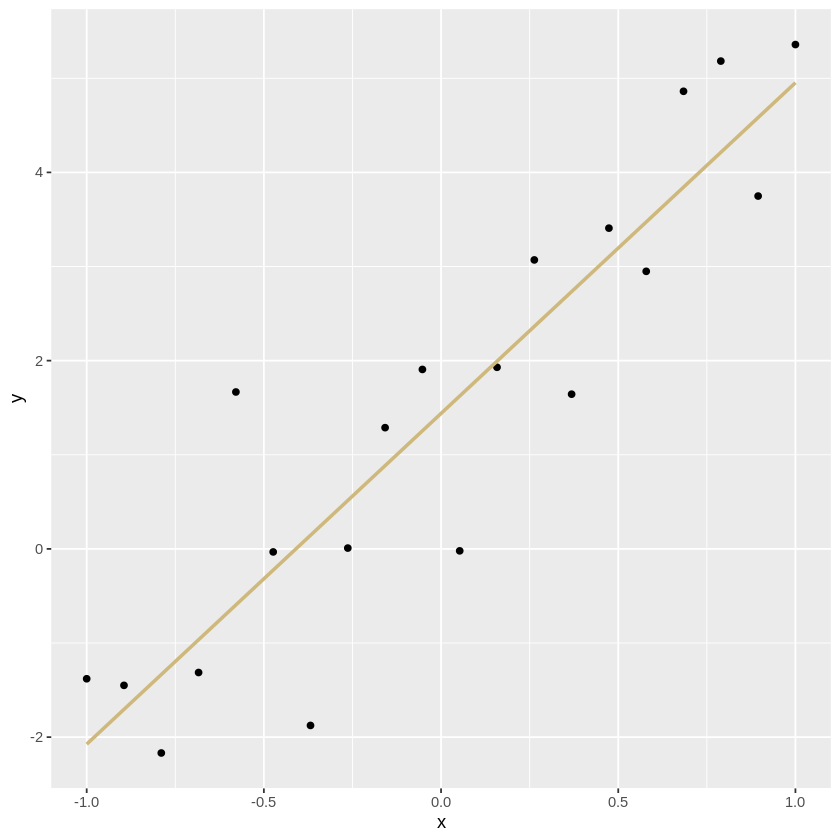

In [16]:
data = sim_data()
lmod = lm(y~x, data=data)
ggplot(aes(x=x, y=y), data=data) + 
    geom_point() +
    geom_smooth(method="lm", formula=y~x, se=FALSE, color="#CFB87C")

The linear model seems to have a decent fit on the generated data.

#### 2. (b) Do the slopes change?

Now we want to see how the slope of our line varies with different random samples of data. Call our data genaration funciton $50$ times to gather $50$ independent samples. Then we can fit a SLR model to each of those samples and plot the resulting slope. The function below performs this for us.

Experiment with different variances and report on what effect that has to the spread of the slopes.

In [21]:
gen_slopes <- function(num.slopes=50, var=1, num.samples=20){
    g = ggplot()
    # Repeat the sample for the number of slopes
    for(ii in 1:num.slopes){
        # Generate a random sampling of data
        data = sim_data(n=num.samples, var=var)
        # Add the slope of the best fit linear model to the plot
        g = g + stat_smooth(aes(x=x, y=y), data=data, formula = y ~ x, method="lm", geom="line", 
                            se=FALSE, alpha=0.4, color="#CFB87C", size=1)
    }
    return(g)
}

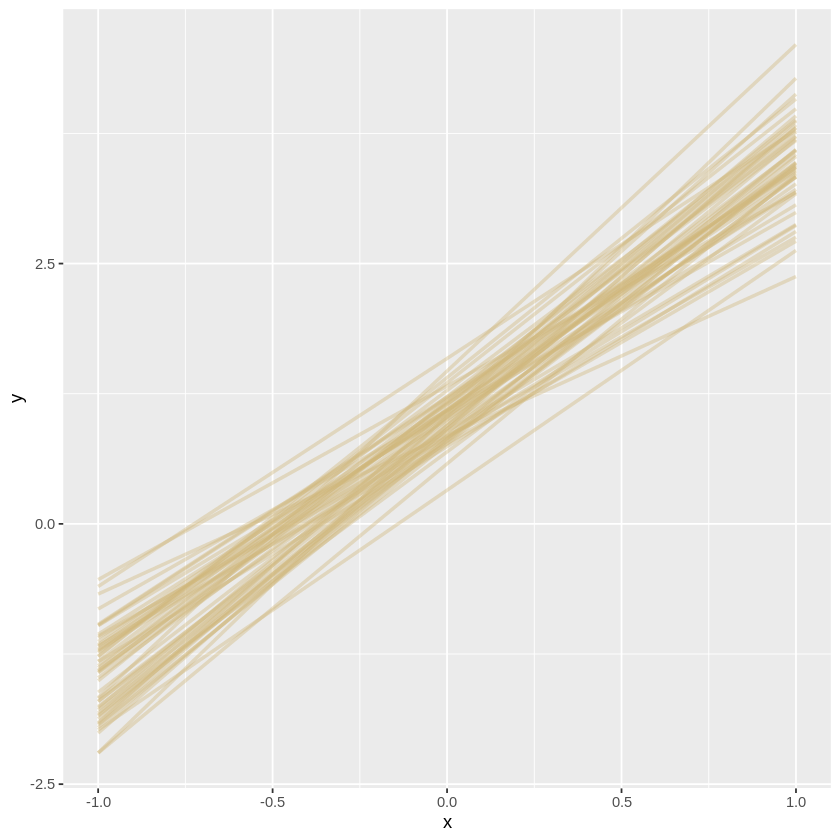

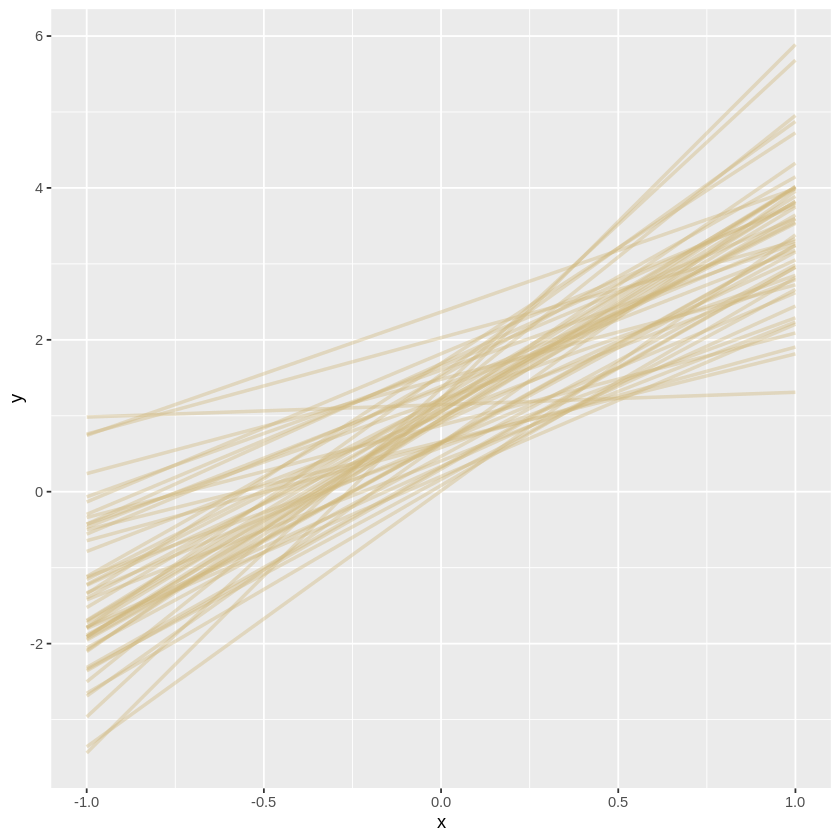

In [24]:
gen_slopes()
gen_slopes(var = 5)

The spread of the slopes increases as the variance increases.

#### 2. (c) Distributions of Slopes

As we see above, the slopes are somewhat random. That means that they follow some sort of distribution, which we can try to discern. The code below computes `num_samples` independent realizations of the model data, computes the SLR model, and generates a histogram of the resulting slopes.

Again, experiment with different variances for the simulated data and record what you notice. What do you notice about the shapes of the resulting histograms?

In [26]:
hist_slopes <- function(num.slopes=500, var=1, num.samples=20){
    slopes = rep(0, num.slopes)
    # For num.slopes, compute a SLR model slope
    for(i in 1:num.slopes){
        # Simulate the desired data
        data = sim_data(var=var, n=num.samples)
        # Fit an SLR model to the data
        lmod = lm(y~x, data=data)
        # Add the slopes to the vector of slopes
        slopes[i] = lmod$coef[2]
    }
    # Plot a histogram of the resulting slopes
    g = ggplot() + aes(slopes) + geom_histogram(bins = 30, color="black", fill="#CFB87C")
    return(g)
}

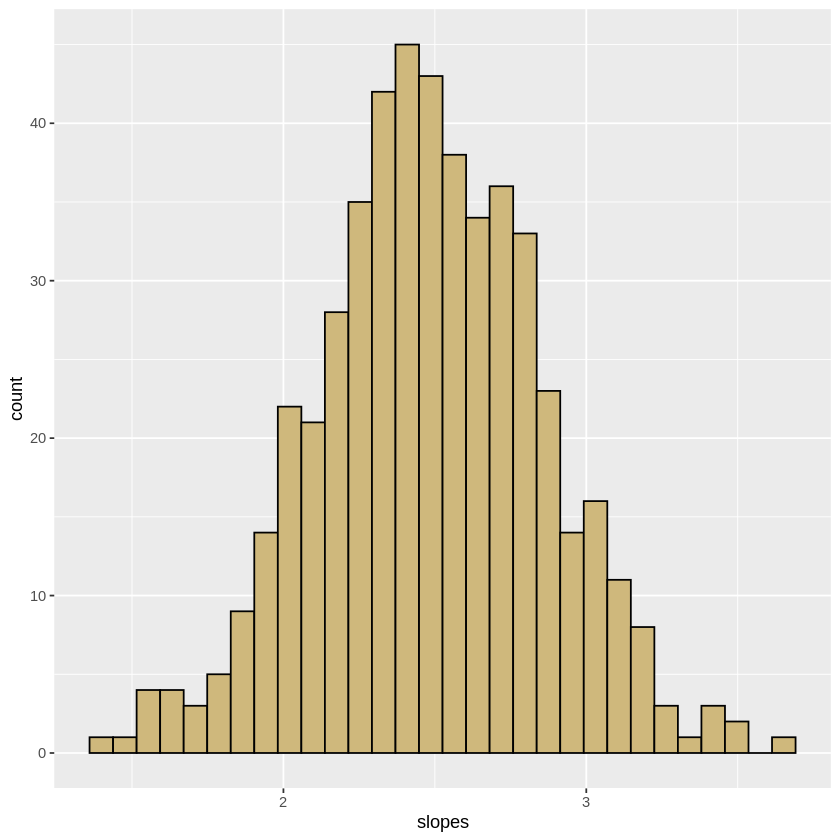

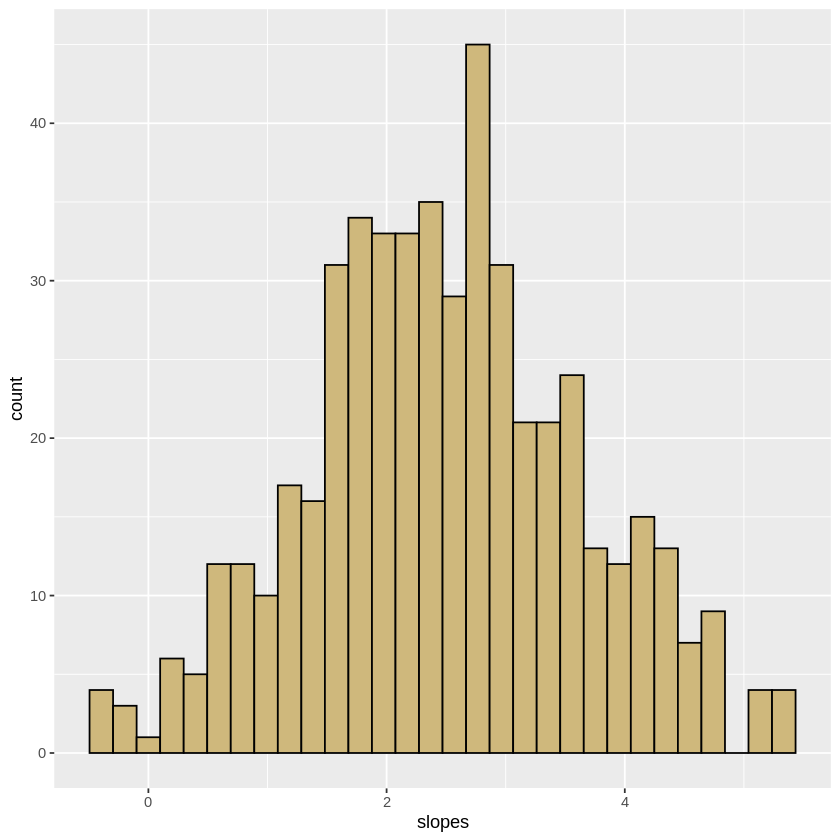

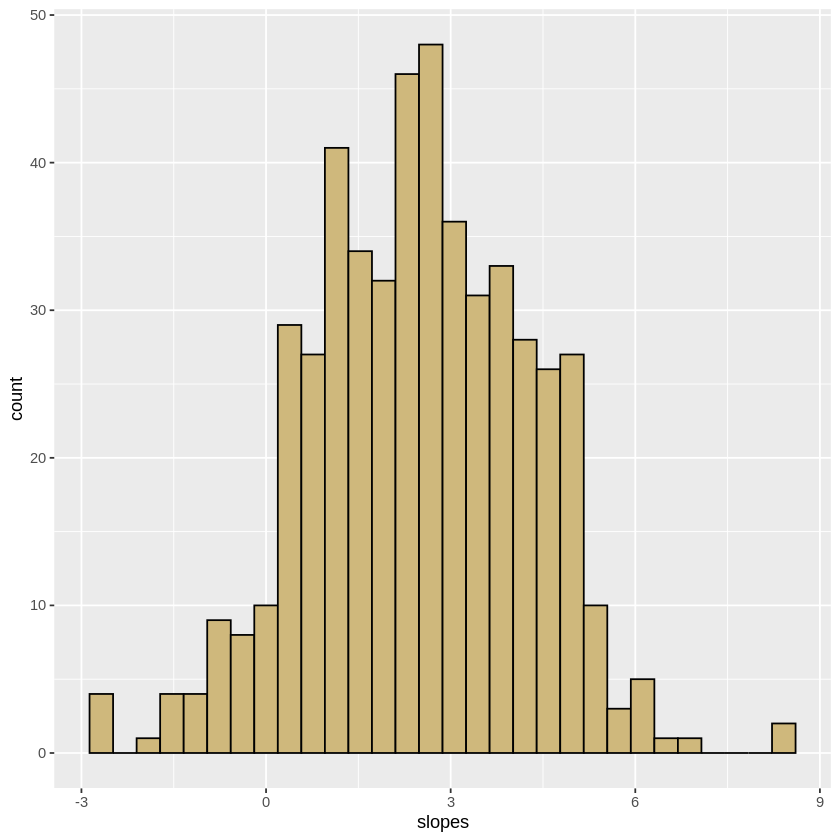

In [31]:
hist_slopes()
hist_slopes(var=10)
hist_slopes(var=20)

As the variance increases, the histogram plot looks less and less simmetrical and overall wider. 

#### 2. (d) Confidence Intervals of Slopes

What does that all mean? It means that when we fit a linear regression model, our parameter *estimates* will not be equal to the true parameters. Instead, the estimates will vary from sample to sample, and form a distribution. This is true for any linear regression model with any data - not just simulated data - as long as we assume that there is a large population that we can resample the response from (at fixed predictor values). Also note that we only demonstrated this fact with the slope estimate, but the same principle is true for the intercept, or if we had several slope parameters.

This simulation shows that there is a chance for a linear regression model to have a slope that is very different from the true slope. But with a large sample size, $n$, or small error variance, $\sigma^2$, the distribution will become narrower. Confidence intervals can help us understand this variability. The procedure that generates confidence intervals for our model parameters has a high probability of covering the true parameter. And, the higher $n$ is, for a fixed $\sigma^2$, or the smaller $\sigma^2$ is, for a fixed $n$, the narrower the confidence interval will be!

Draw a single sample of size $n=20$ from `sim_data()` with variance $\sigma^2 = 1$.  Use your sample to compute a 95% confidence interval for the slope. Does the known slope for the model (which we can recall is $2.5$) fall inside your confidence interval?  How does the value of $\sigma^2$ affect the CI width?

In [35]:
data

x,y
<dbl>,<dbl>
-1.00000000,-2.8605433
-0.89473684,-0.9784387
-0.78947368,-2.2230406
-0.68421053,0.9408296
-0.57894737,0.7936769
-0.47368421,0.8335453
-0.36842105,-0.8668338
-0.26315789,1.0795772
-0.15789474,0.4789684


In [37]:
# Your code here
data = sim_data()
lin_model = lm(y ~ x, data = data)
confint(lin_model)

,2.5 %,97.5 %
(Intercept),0.6457947,1.627452
x,2.1609169,3.778206


- Yes, the Confidence Interval covers the true value of the slope, namely 2.5.
- The larger $\sigma^2$ is, the larger the resulting Confidence Interval will be. 